# Checking if a pair of stocks is cointegrated

## Imports

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import quiz_tests

In [4]:
# Set plotting options
%matplotlib inline
plt.rc('figure', figsize=(16, 9))

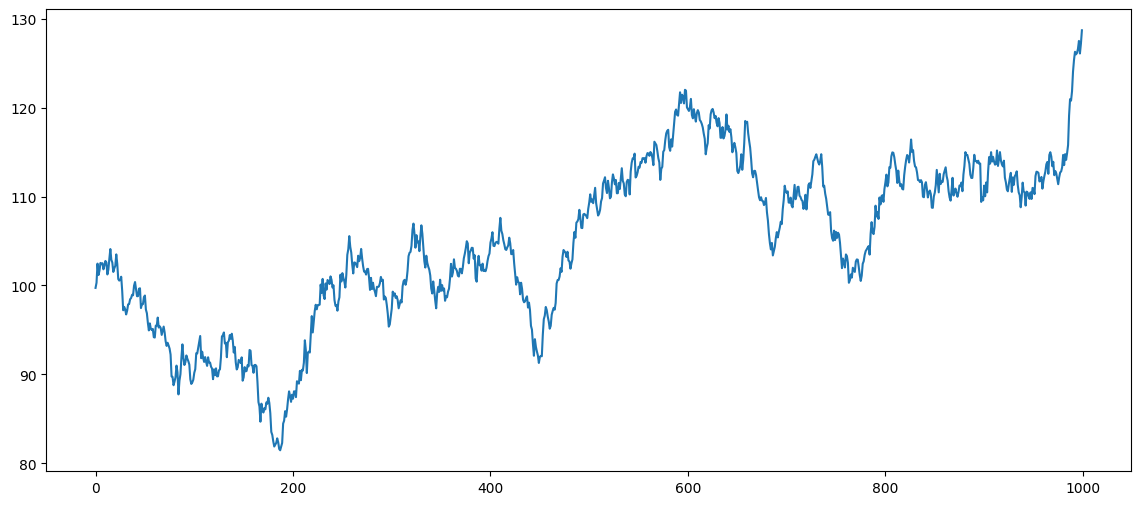

In [5]:
# just set the seed for the random number generator
np.random.seed(2018)

# use returns to create a price series
drift = 100

r1 = np.random.normal(0, 1, 1000) 
s1 = pd.Series(np.cumsum(r1), name='s1') + drift

s1.plot(figsize=(14,6))
plt.show()

In [7]:
print(r1)
s1.head()

[-2.76767596e-01  5.81851002e-01  2.14839926e+00 -1.27948700e+00
  5.02276889e-01  8.56029296e-01 -1.42790075e-01  1.10078666e-01
 -6.88064791e-01  4.33564082e-01  5.10221003e-01 -1.65130974e-01
 -1.35177905e+00  5.46630750e-01  1.23065512e+00  1.07644610e+00
 -1.21062488e+00 -3.06676569e-01 -1.05741884e+00  4.02056921e-01
  2.89165121e-01  1.28273322e+00 -1.06569580e+00 -1.70663287e+00
 -1.72797393e-01  6.37101726e-02  3.70628385e-01 -1.60454294e+00
 -2.16572937e+00  3.80370127e-01 -2.76501090e-01 -5.75681945e-01
  4.21854306e-01  7.04780297e-01  4.54011621e-02  5.30690071e-01
  1.38125362e-01  3.70463134e-01 -5.38778035e-02  1.07279600e+00
  4.15252590e-01 -7.91557014e-01 -8.03374873e-01  4.00007944e-03
  8.38188404e-01  4.70837213e-02 -2.22118689e+00  4.48790447e-01
 -1.34337769e-02  7.87042476e-01  1.88334139e-01 -1.58023087e+00
 -4.13551675e-01 -1.07636254e+00 -8.51835221e-01  7.84754601e-01
 -6.05772273e-01 -1.48533594e-01  1.33759093e-01 -9.28089992e-01
 -4.26957611e-02  1.33791

0    99.72323240
1   100.30508341
2   102.45348267
3   101.17399567
4   101.67627255
Name: s1, dtype: float64

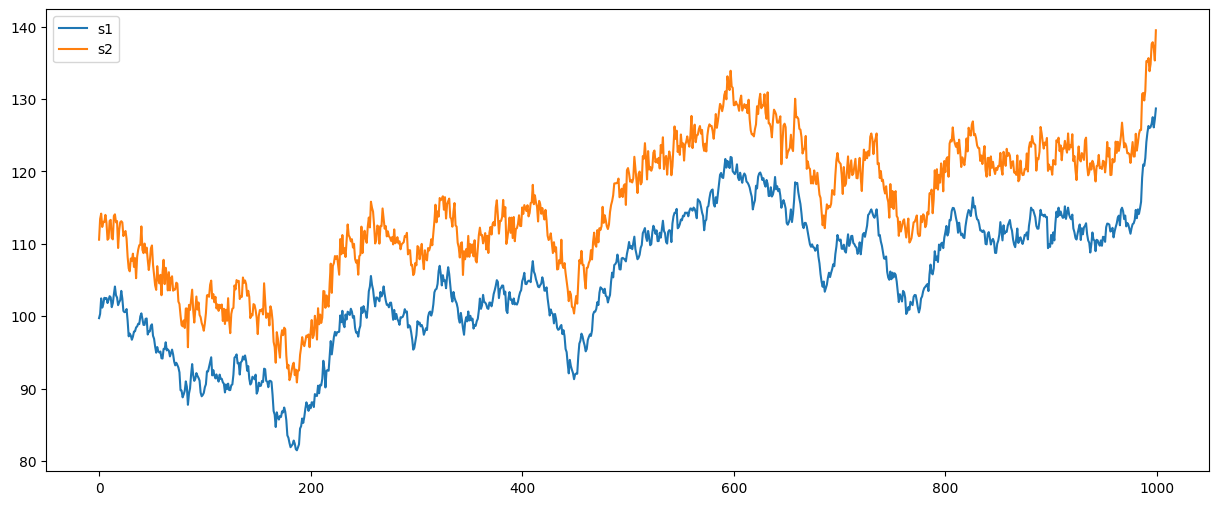

In [5]:
offset = 10
noise = np.random.normal(0, 1, 1000)
s2 = s1 + offset + noise
s2.name = 's2'
pd.concat([s1, s2], axis=1).plot(figsize=(15,6))
plt.show()

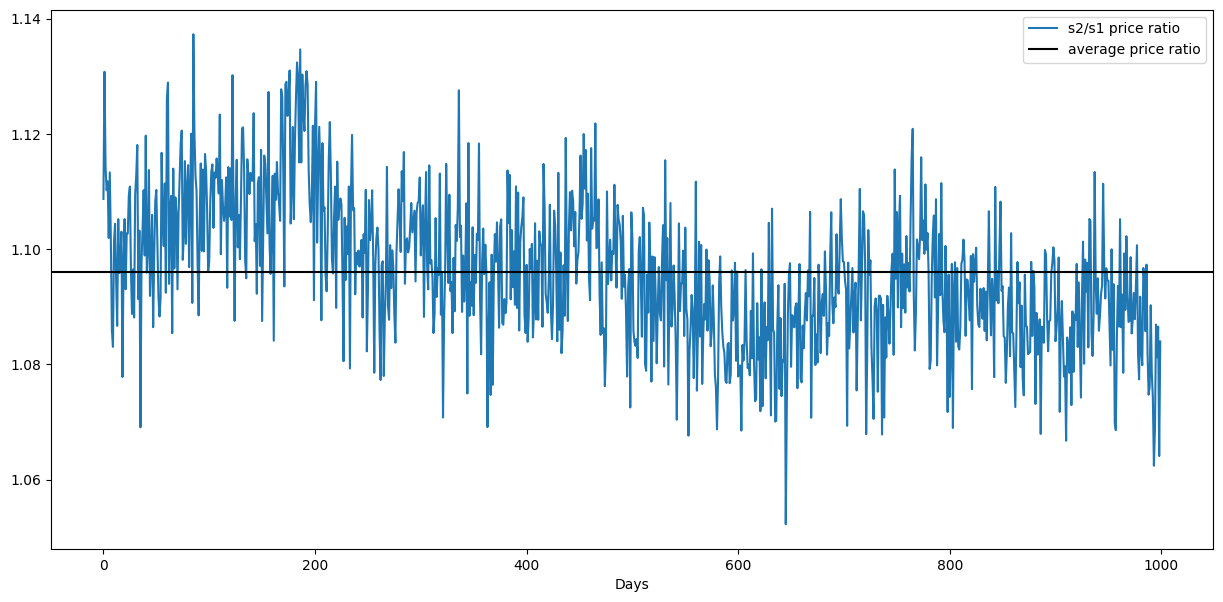

average price ratio 1.0960


In [6]:
price_ratio = s2/s1
price_ratio.plot(figsize=(15,7)) 
plt.axhline(price_ratio.mean(), color='black') 
plt.xlabel('Days')
plt.legend(['s2/s1 price ratio', 'average price ratio'])
plt.show()
print(f"average price ratio {price_ratio.mean():.4f}")

## Calculate hedge ratio with regression

## Linear Regression

Note that the LinearRegression().fit() expects 2D numpy arrays.  Since s1 and s2 are pandas series, we can use Series.values to get the values as a numpy array. Since these are 1D arrays, we can use numpy.reshape(-1,1) to make these 1000 row by 1 column 2 dimensional arrays

In [7]:
type(s1)

pandas.core.series.Series

In [8]:
type(s1.values)

numpy.ndarray

In [9]:
s1.values.reshape(-1,1).shape

(1000, 1)

In [11]:
lr = LinearRegression()
lr.fit(s1.values.reshape(-1,1),s2.values.reshape(-1,1))

LinearRegression()

In [12]:
hedge_ratio = lr.coef_[0][0]
hedge_ratio

1.002234357791276

In [13]:
intercept = lr.intercept_[0]
intercept

9.753022747192901

In [14]:
print(f"hedge ratio from regression is {hedge_ratio:.4f}, intercept is {intercept:.4f}")

hedge ratio from regression is 1.0022, intercept is 9.7530


 ## Question
 Do you think we'll need the intercept when calculating the spread?  Why or why not?

#### Since the intercept is a constant, it's not necesary to include it in the spread, since it just shifts the spread up by a constant. We use the spread to check when it deviates from its historical average, so what matters going foward is how the spread differs from this average.

## Calculate the spread

In [15]:
spread = s2 - s1 * hedge_ratio

In [16]:
print(f"Average spread is {spread.mean()}")

Average spread is 9.753022747192906


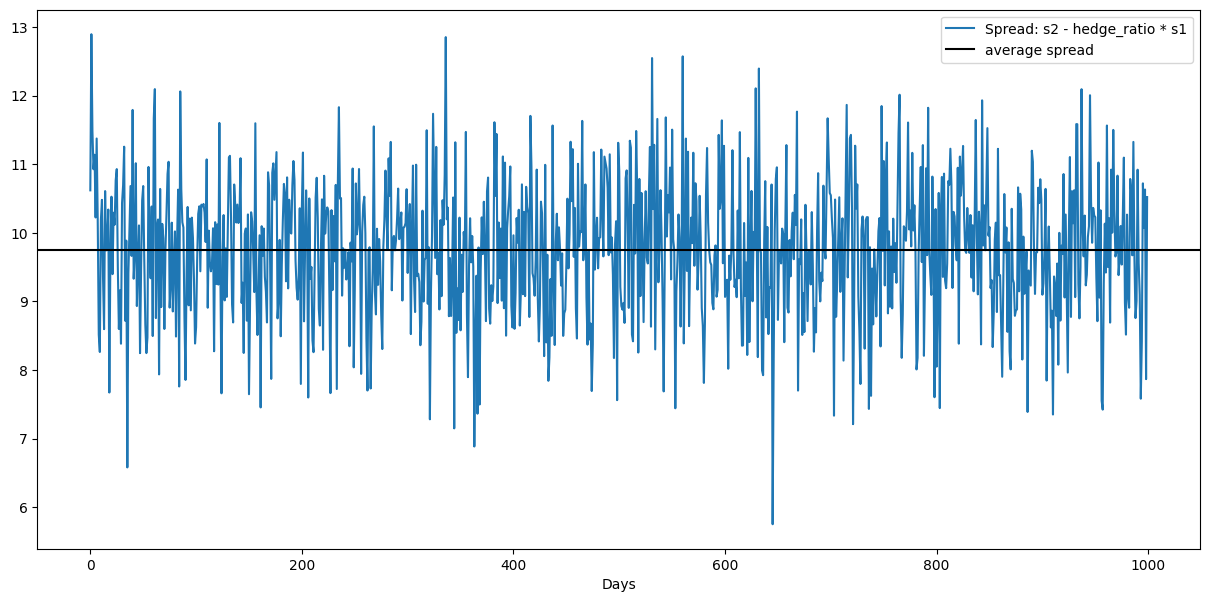

In [17]:
spread.plot(figsize=(15,7)) 
plt.axhline(spread.mean(), color='black') 
plt.xlabel('Days')
plt.legend(['Spread: s2 - hedge_ratio * s1', 'average spread'])
plt.show()

## Let's see what we get if we include the intercept of the regression

In [18]:
spread_with_intercept = s2 - (s1 * hedge_ratio + intercept)
print(f"Average spread with intercept included is {spread_with_intercept.mean()}")

Average spread with intercept included is 6.210143510543276e-15


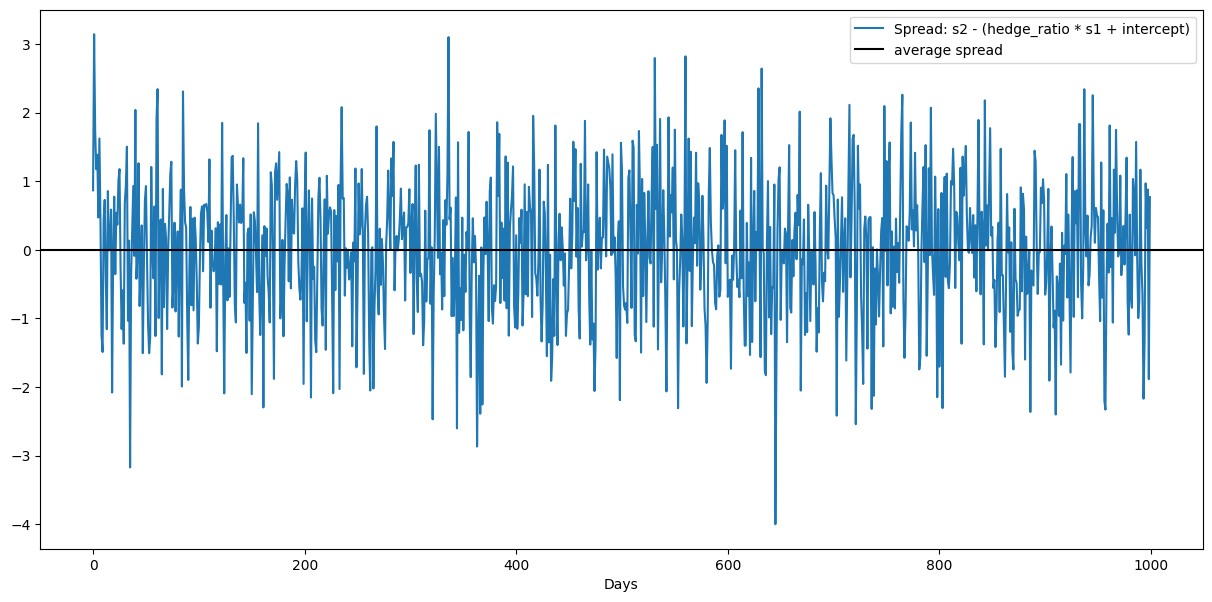

In [19]:
spread_with_intercept.plot(figsize=(15,7)) 
plt.axhline(spread_with_intercept.mean(), color='black') 
plt.xlabel('Days')
plt.legend(['Spread: s2 - (hedge_ratio * s1 + intercept)', 'average spread'])
plt.show()

## Quiz
### Check if spread is stationary using Augmented Dickey Fuller Test

The [adfuller](http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html) function is part of the statsmodel library.

```
adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)[source]

adf (float) – Test statistic
pvalue (float) – p-value
...
```

In [23]:
def is_spread_stationary(spread, p_level=0.05):
    """
    spread: obtained from linear combination of two series with a hedge ratio
    
    p_level: level of significance required to reject null hypothesis of non-stationarity
    
    returns:
        True if spread can be considered stationary
        False otherwise
    """
    #TODO: use the adfuller function to check the spread
    adf_result = adfuller(spread, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    
    #get the p-value
    print(adf_result)
    pvalue = adf_result[1]
    
    print(f"pvalue {pvalue:.4f}")
    if pvalue <= p_level:
        print(f"pvalue is <= {p_level}, assume spread is stationary")
        return True
    else:
        print(f"pvalue is > {p_level}, assume spread is not stationary")
        return False
    
quiz_tests.test_is_spread_stationary(is_spread_stationary)

(-30.161069431561664, 0.0, 0, 999, {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}, 2770.840780057449)
pvalue 0.0000
pvalue is <= 0.05, assume spread is stationary
Tests Passed


In [24]:
# Try out your function
print(f"Are the two series candidates for pairs trading? {is_spread_stationary(spread)}")

(-30.161069431561664, 0.0, 0, 999, {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}, 2770.840780057449)
pvalue 0.0000
pvalue is <= 0.05, assume spread is stationary
Are the two series candidates for pairs trading? True


If you're stuck, you can also check out the solution [here](pairs_candidates_solution.ipynb)